#**WINE CLUSTERING**
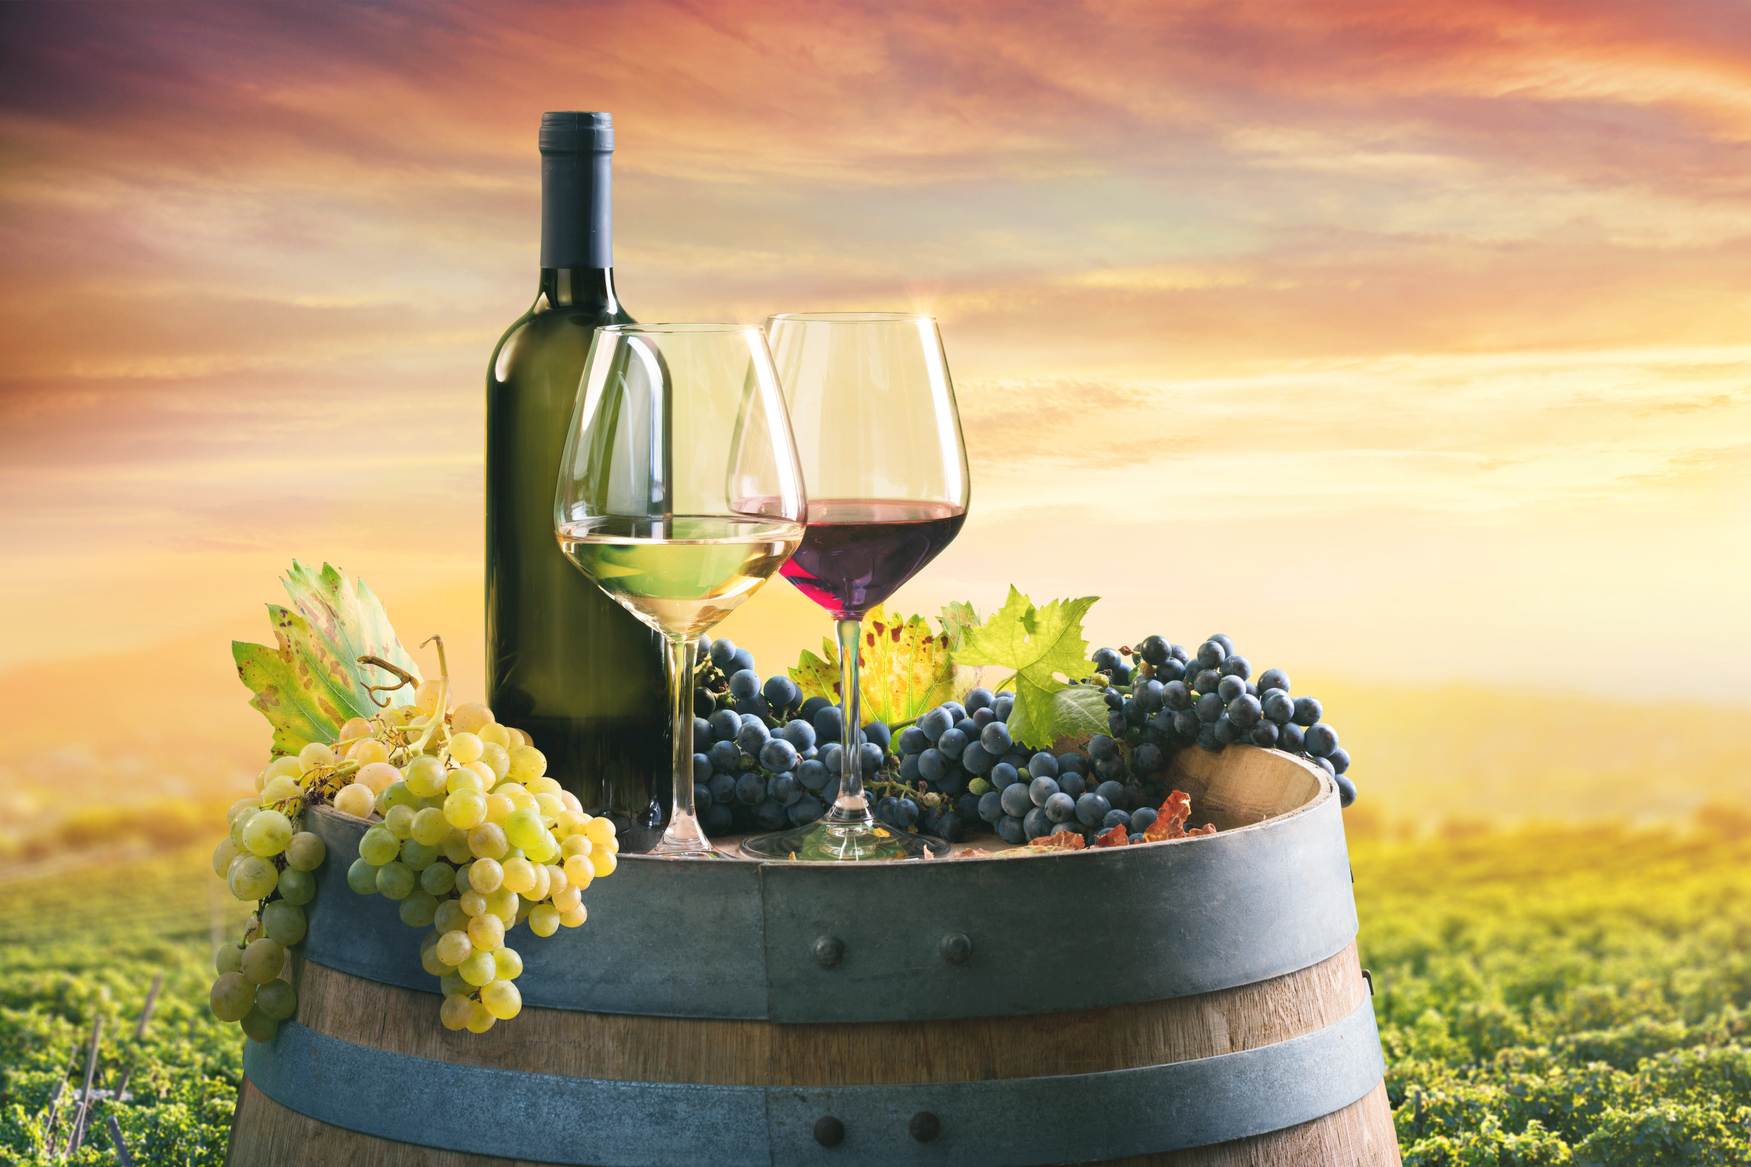

**Background**

Wine is an alcoholic beverage made with the fermented juice of grapes.

Technically, any fruit is capable of being used for wine (i.e., apples, cranberries, plums, etc.), but if it just says “wine” on the label, then it’s made with grapes. (By the way, wine grapes are different than table grapes).

The difference between two popular drinks, wine and beer, is that brewing beer involves fermented grains. Simply, wine is made from fruit, and beer is made from grains


### 1.   Defining the Question



* The goal of this project is to use unsupervised learning techniques to identify 
wine categories. Our dataset is composed of 13 numerical physical-chemical measurements which will be used by a gaussian mixture model to identify these distinct categories. We will not assume any particular number of clusters beforehand but will rather use the silhouette score as an indicator of the best number of clusters to segment our data by.







### 2.  Metric of Success

The project will be considered a success when we are able to cluster wines based on numerical values  which are their chemical compositions and properties.


### 3. Experimental Design
Below are the steps taken in this analysis
 1. loading the required libraries
 2. Loading and previewing data
 3. Cleaning the data
 4. Univariate analysis
 5. Bivariate analysis
 6. Multivariate analysis
 7. Modelling (K-Means)
 8. Challenging the solution and giving insights on how improvements can be made.

### 4. Data Relevance

About Dataset

This dataset is adapted from the Wine Data Set from https://archive.ics.uci.edu/ml/datasets/wine by removing the information about the types of wine for unsupervised learning.

The following descriptions are adapted from the UCI webpage:

These data are the results of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars. The analysis determined the quantities of 13 constituents found in each of the three types of wines.

The attributes are:

Alcohol -  the alcohol content

Malic acid -  malic acid concentration 

Ash-  ash content in wine

Alcalinity of ash -  water balance in wine

Magnesium -  magnesium content

Total phenols -  phenols quantity in wine

Flavanoids -     flavonoids content in wine

Nonflavanoid phenols -   non flavonoids measure

Proanthocyanins -    proanthocyanidins composition

Color intensity -    color pigment concentration

Hue -   coloring measure 

OD280/OD315 of diluted wines -    protein content 

Proline -       amino acid content composition


### 5 . Importing Libraries

In [ ]:
# %matplotlib notebook
# import numpy as np
# import pandas as pd
# import random
# from IPython.display import display #for displaying dataframes nicely
# import matplotlib.pyplot as plt
# import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import missingno as msno
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import linkage,dendrogram
from sklearn.decomposition import PCA
import plotly.express as px
import warnings   
warnings.filterwarnings("ignore",category=DeprecationWarning)
warnings.filterwarnings("ignore",category=FutureWarning)

### 6 . Loading Data 

In [ ]:
#Loading the Dataset
df=pd.read_csv('/content/drive/MyDrive/wine-clustering.csv')
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


### 7. Reading Data 

In [ ]:
#Previewing the dataset
df.head(5)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [ ]:
#Previewing the bottom of the dataset
df.tail(5)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.3,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840
177,14.13,4.10,2.74,24.5,96,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560


In [ ]:
#Checking the number of entries in our dataset
df.shape
print("The dataset contains {} rows, and {} columns".format(df.shape[0], df.shape[1]))

The dataset contains 178 rows, and 13 columns


In [ ]:
#Displaying the summary statistic
df.describe(include='all')

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


### 8 . Tidying  Data


In [ ]:
#Displaying our columns 
df.columns

Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline'],
      dtype='object')

In [ ]:
#Displaying the number of records in each column
df.count()

Alcohol                 178
Malic_Acid              178
Ash                     178
Ash_Alcanity            178
Magnesium               178
Total_Phenols           178
Flavanoids              178
Nonflavanoid_Phenols    178
Proanthocyanins         178
Color_Intensity         178
Hue                     178
OD280                   178
Proline                 178
dtype: int64

In [ ]:
#Checking for missing values
df.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64


The dataset contains no missing values


In [ ]:
#Checking for duplicated values
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
173    False
174    False
175    False
176    False
177    False
Length: 178, dtype: bool

The dataset contains no duplicated values


In [ ]:
#Checking for unique values
df.nunique()

Alcohol                 126
Malic_Acid              133
Ash                      79
Ash_Alcanity             63
Magnesium                53
Total_Phenols            97
Flavanoids              132
Nonflavanoid_Phenols     39
Proanthocyanins         101
Color_Intensity         132
Hue                      78
OD280                   122
Proline                 121
dtype: int64

In [ ]:
#Checking for additional column information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [ ]:
#Checking for outliers
import plotly.express as px
import plotly.graph_objects as go
fig = go.Figure()

fig.add_trace(
    go.Box(y= df['Alcohol'], name='Alcohol'),
)
fig.add_trace(
    go.Box(y= df['Malic_Acid'], name='Malic_Acid'),
)
fig.add_trace(
    go.Box(y= df['Ash'], name="Ash"),
)

fig.add_trace(
    go.Box(y=df['Ash_Alcanity'], name="Ash_Alcanity"),

)

fig.add_trace(
    go.Box(y= df['Magnesium'], name="Magnesium"),
)

fig.add_trace(
    go.Box(y= df['Total_Phenols'], name="Total_Phenols"),
)

fig.add_trace(
    go.Box(y= df['Flavanoids'], name="Flavanoids"),
)

fig.add_trace(
    go.Box(y= df['Nonflavanoid_Phenols'], name="Nonflavanoid_Phenols"),
)
fig.add_trace(
    go.Box(y=df['Proanthocyanins'], name = 'Proanthocyanins '),
)
fig.add_trace(
    go.Box(y=df['Color_Intensity'], name='Color_Intensity '),
)    
fig.add_trace(
    go.Box(y=df['Hue'], name='Hue'),
)
fig.add_trace(
    go.Box(y=df['OD280'],name='OD280'),
)

fig.update_layout(
    title_text="Checking for Outliers",
    yaxis_title_text="Values",
    height=800, 
    width=2000
)
fig.show()

###9. Exploratory Data Analysis

**Univariate Analysis**

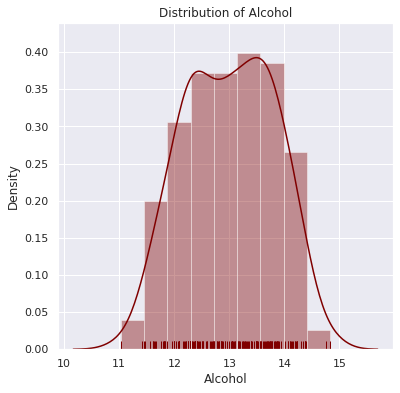

In [ ]:
# Ploting  distribution graph for Alcohol
sns.set(rc={'figure.figsize':(6,6)})
sns.distplot(df['Alcohol'],color='Maroon',rug=True)
plt.title('Distribution of Alcohol')
plt.show()

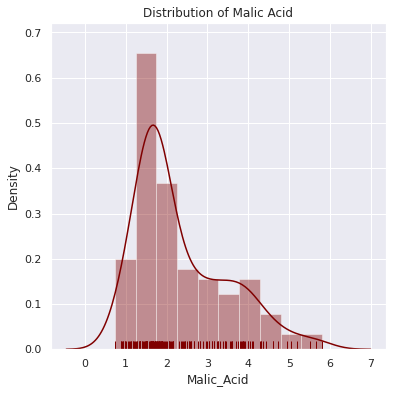

In [ ]:
# Ploting  distribution graph for Malic Acid
sns.set(rc={'figure.figsize':(6,6)})
sns.distplot(df['Malic_Acid'],color='Maroon',rug=True)
plt.title('Distribution of Malic Acid')
plt.show()

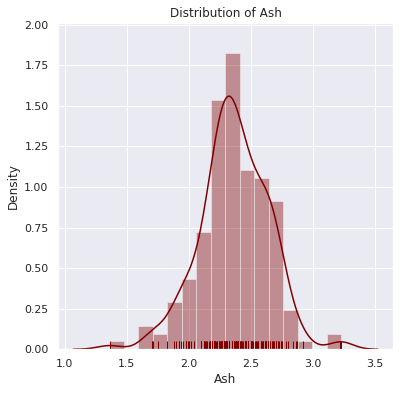

In [ ]:
# Ploting  distribution graph for Ash
sns.set(rc={'figure.figsize':(6,6)})
sns.distplot(df['Ash'],color='Maroon',rug=True)
plt.title('Distribution of Ash')
plt.show()

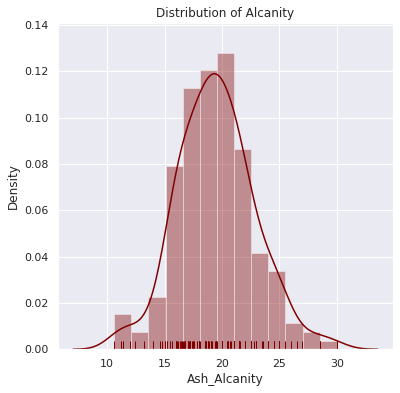

In [ ]:
# Ploting  distribution graph for Ash Alcanity
sns.set(rc={'figure.figsize':(6,6)})
sns.distplot(df['Ash_Alcanity'],color='maroon',rug=True)
plt.title('Distribution of Alcanity')
plt.show()

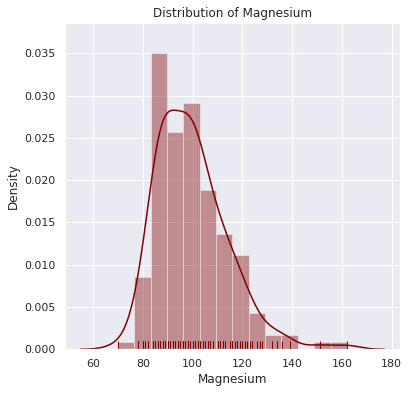

In [ ]:
# Ploting  distribution graph for Magnesium
sns.set(rc={'figure.figsize':(6,6)})
sns.distplot(df['Magnesium'],color='maroon',rug=True)
plt.title('Distribution of Magnesium')
plt.show()

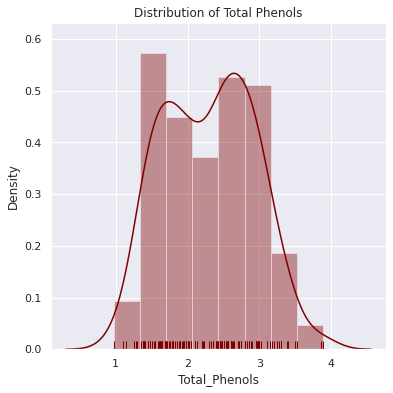

In [ ]:
# Ploting  distribution graph for Total Phenols
sns.set(rc={'figure.figsize':(6,6)})
sns.distplot(df['Total_Phenols'],color='maroon',rug=True)
plt.title('Distribution of Total Phenols')
plt.show()

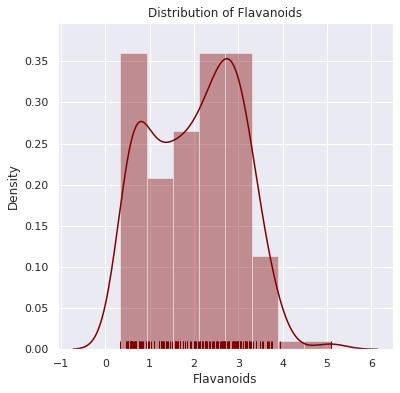

In [ ]:
# Ploting  distribution graph for Flavanoids
sns.set(rc={'figure.figsize':(6,6)})
sns.distplot(df['Flavanoids'],color='maroon',rug=True)
plt.title('Distribution of Flavanoids')
plt.show()

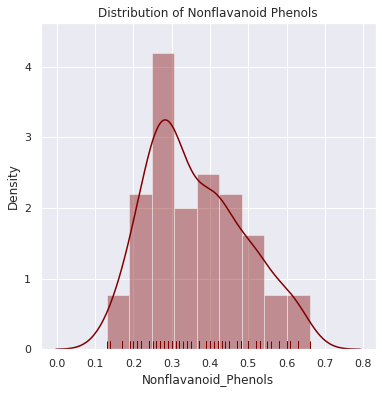

In [ ]:
# Ploting  distribution graph for Non Flavoid Phenols
sns.set(rc={'figure.figsize':(6,6)})
sns.distplot(df['Nonflavanoid_Phenols'],color='maroon',rug=True)
plt.title('Distribution of Nonflavanoid Phenols')
plt.show()

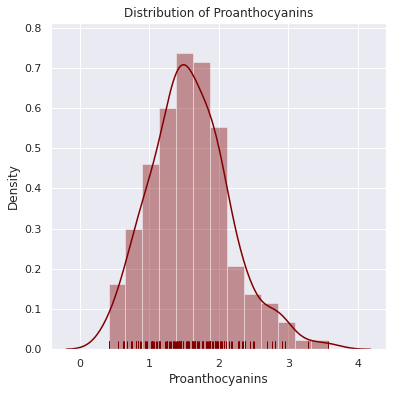

In [ ]:
# Ploting  distribution graph for Proanthocyanins
sns.set(rc={'figure.figsize':(6,6)})
sns.distplot(df['Proanthocyanins'],color='maroon',rug=True)
plt.title('Distribution of Proanthocyanins')
plt.show()

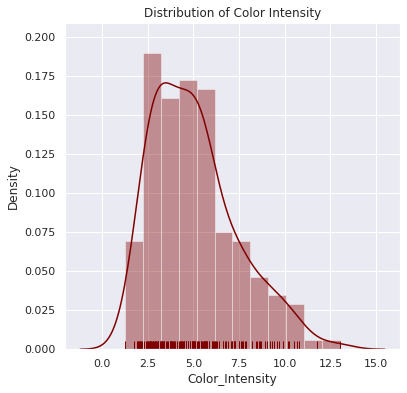

In [ ]:
# Ploting  distribution graph for Color Intensity
sns.set(rc={'figure.figsize':(6,6)})
sns.distplot(df['Color_Intensity'],color='maroon',rug=True)
plt.title('Distribution of Color Intensity')
plt.show()

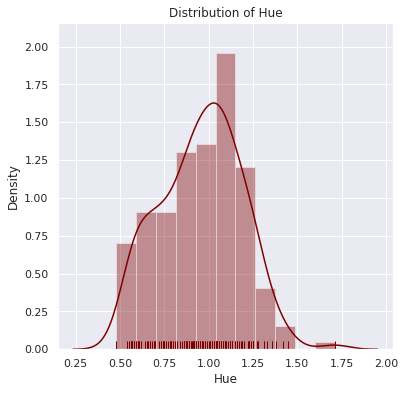

In [ ]:
# Ploting  distribution graph for Hue
sns.set(rc={'figure.figsize':(6,6)})
sns.distplot(df['Hue'],color='maroon',rug=True)
plt.title('Distribution of Hue')
plt.show()

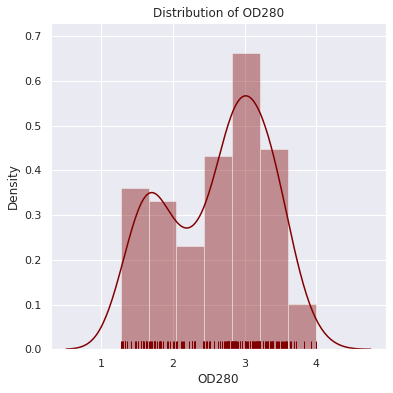

In [ ]:
# Ploting  distribution graph for OD280
sns.set(rc={'figure.figsize':(6,6)})
sns.distplot(df['OD280'],color='maroon',rug=True)
plt.title('Distribution of OD280')
plt.show()

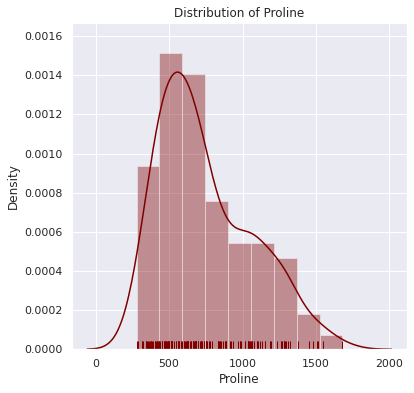

In [ ]:
# Ploting  distribution graph for Proline
sns.set(rc={'figure.figsize':(6,6)})
sns.distplot(df['Proline'],color='maroon',rug=True)
plt.title('Distribution of Proline')
plt.show()

 **Bivariate Analysis**

<Figure size 1800x1800 with 0 Axes>

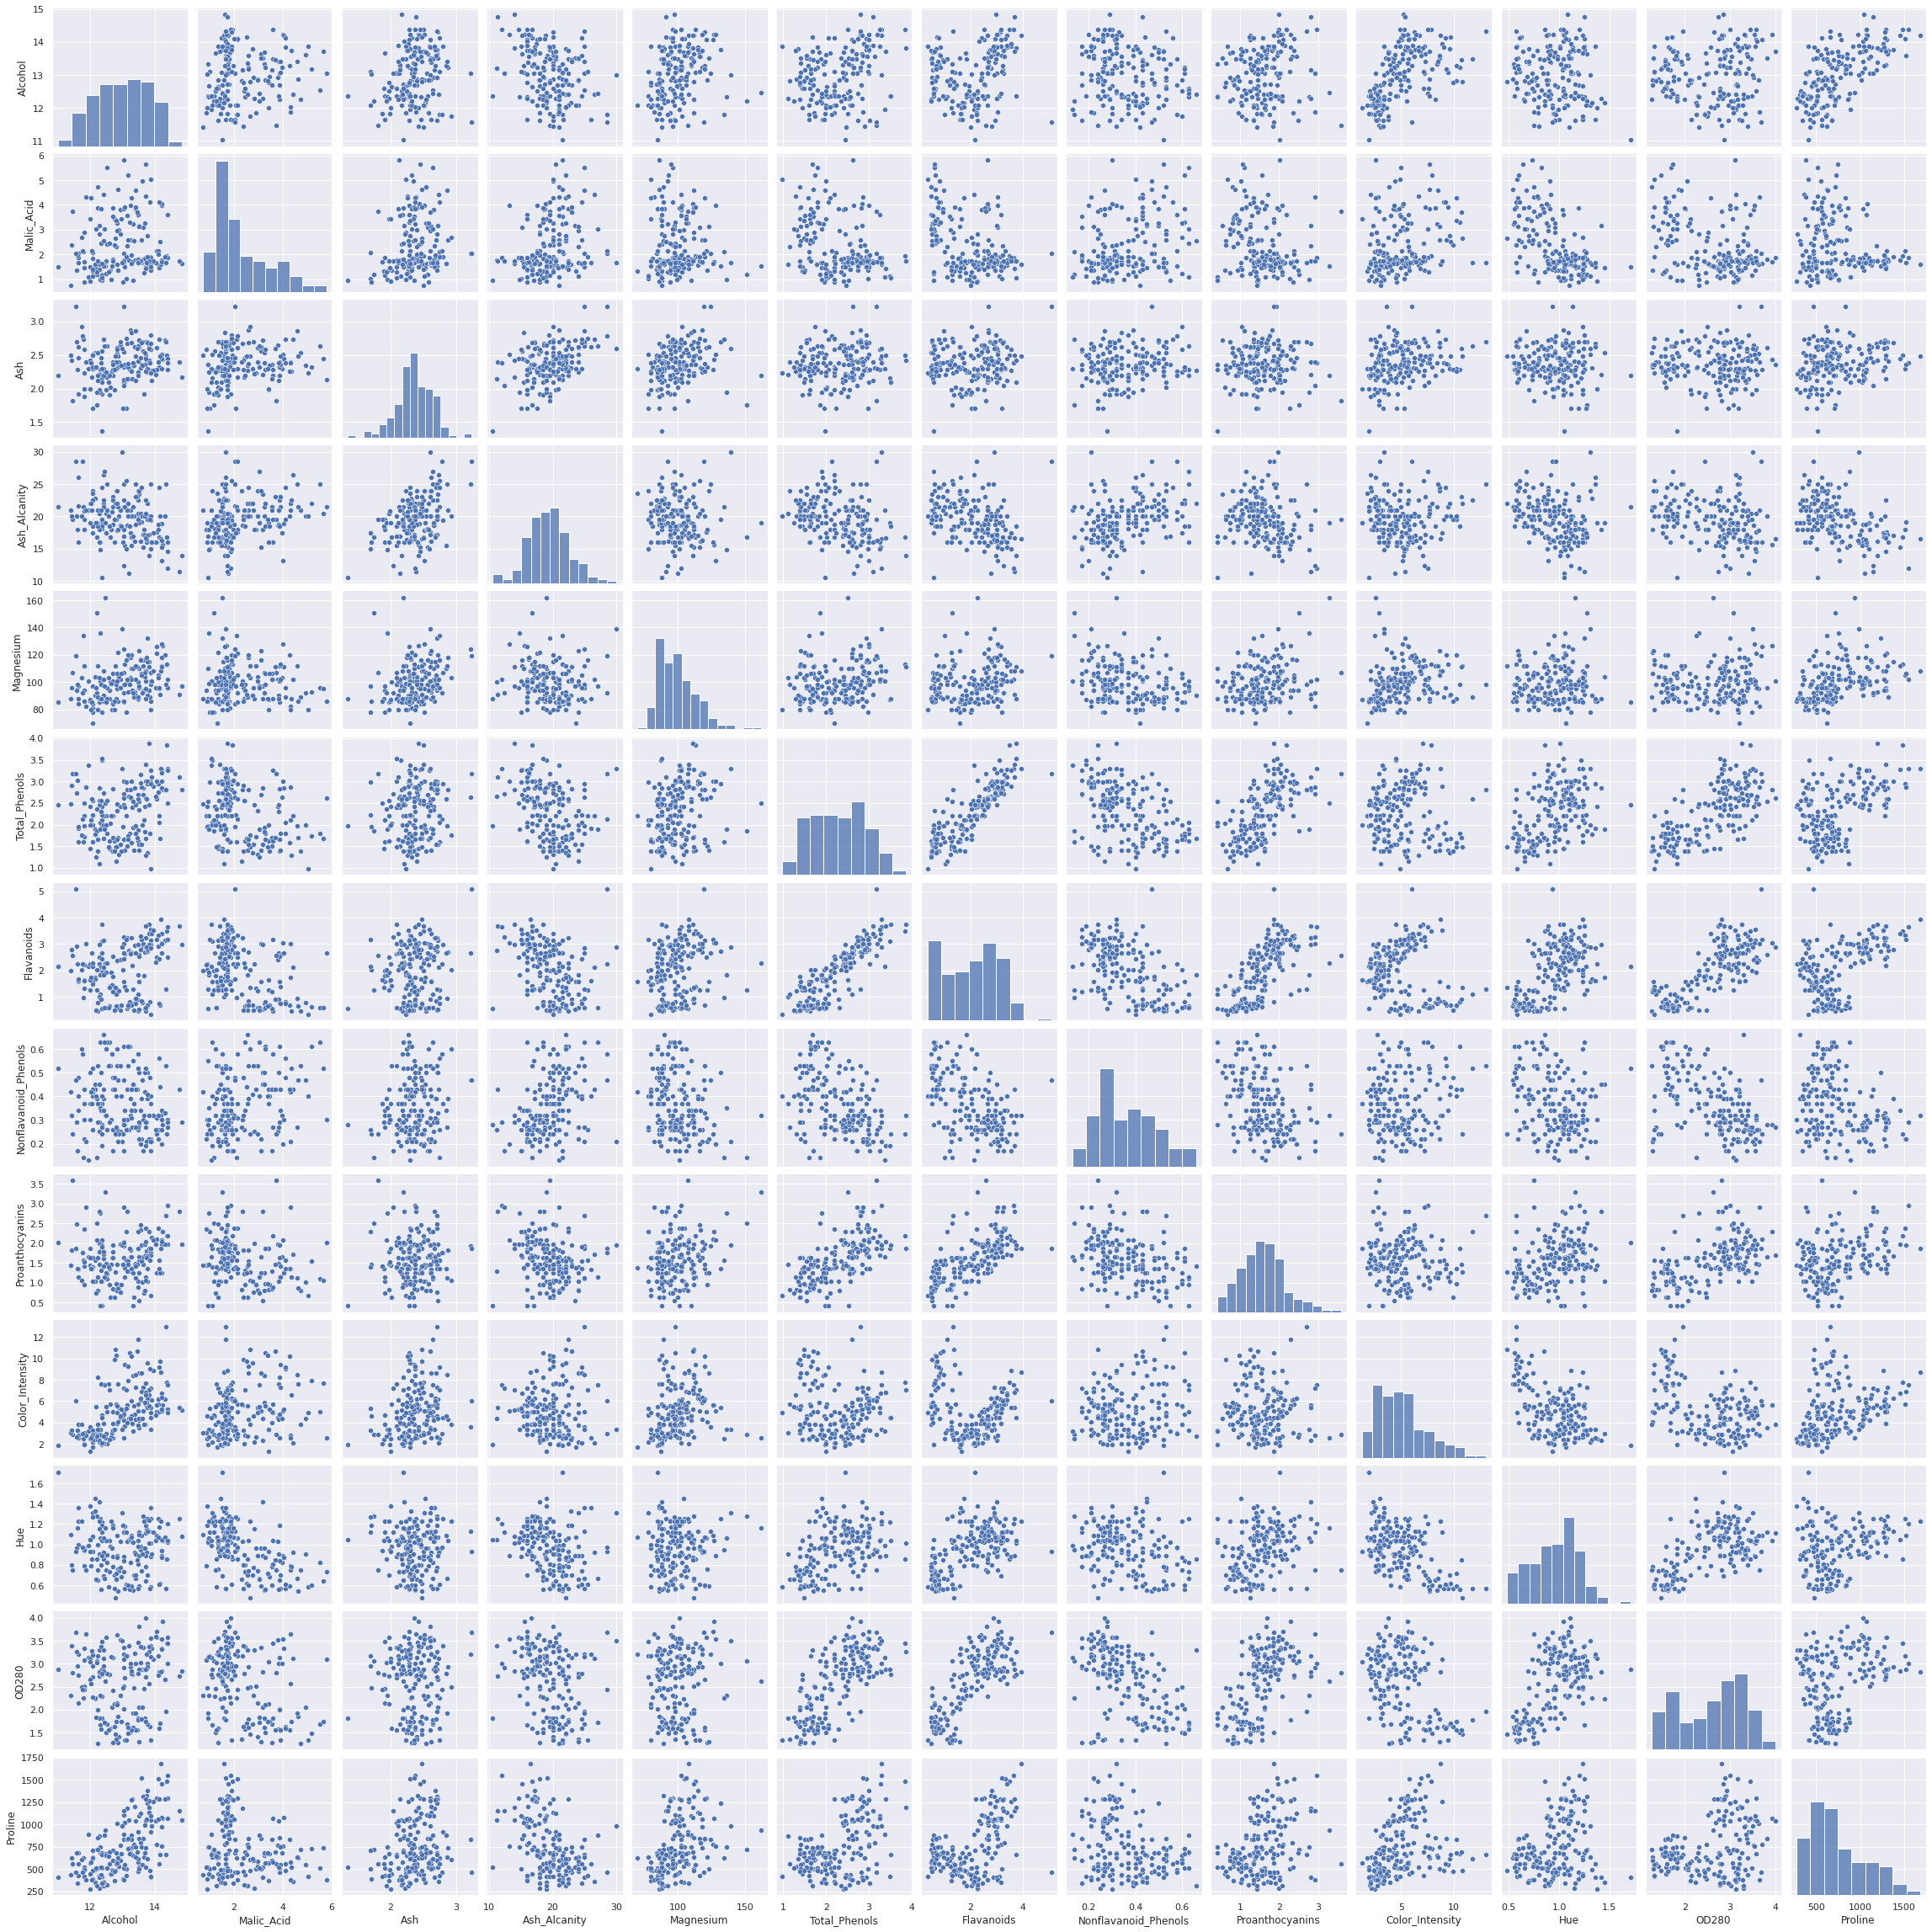

In [ ]:
#A pair plot to show the relationship between all variables
plt.figure(figsize=(25,25))
sns.pairplot(df)
plt.show()

**Correlation**

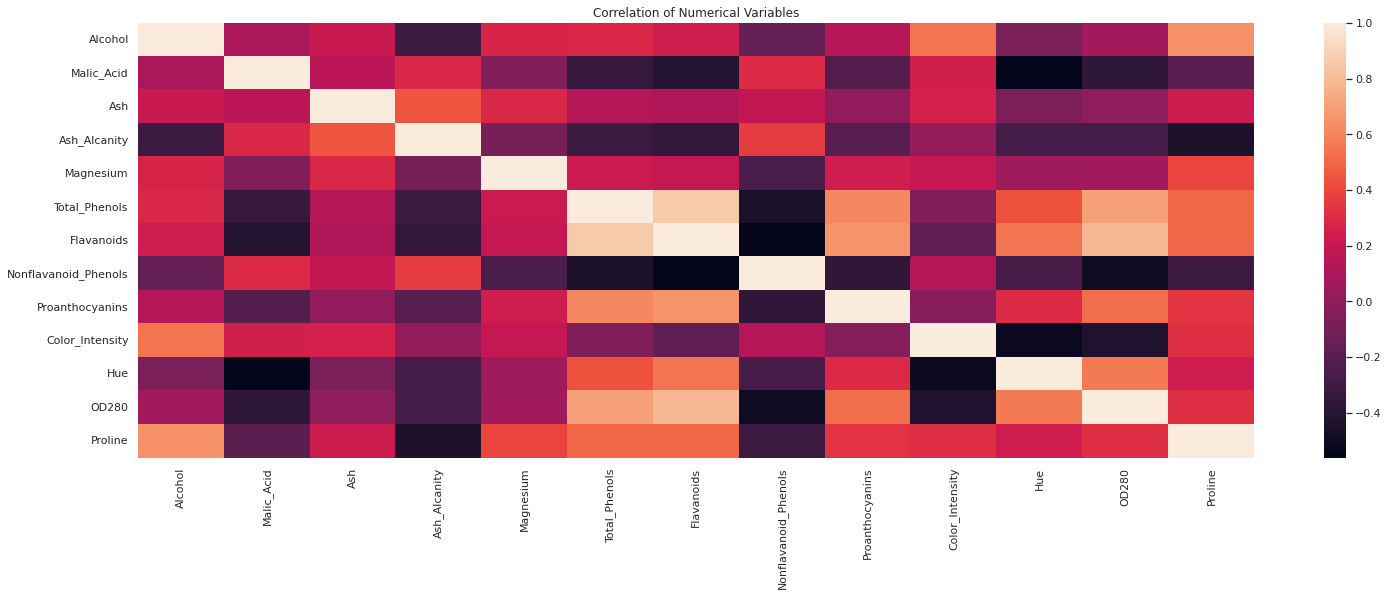

In [ ]:
#Plotting a heatmap to show correlation
import seaborn as sns
plt.figure(figsize=(25,8))
sns.heatmap(df.corr()).set(title='Correlation of Numerical Variables')
plt.show()

**Normalization**

In [ ]:
#test alternative normalization
from sklearn.preprocessing import MinMaxScaler
from scipy import stats

#scale to gaussian
wines_mets= (df)
wines_scaled = wines_mets.apply(lambda x: stats.boxcox(x+1e-8)[0], axis=0)

scaler = MinMaxScaler()

wines_norm = pd.DataFrame(wines_scaled)

wines_norm = pd.DataFrame(scaler.fit_transform(wines_scaled), columns=wines_scaled.columns)

# Show an example of a record with scaling applied
display(wines_norm.describe())

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,0.510623,0.565732,0.498065,0.492922,0.540518,0.495549,0.415735,0.550339,0.464158,0.530008,0.402656,0.454621,0.520093
std,0.213958,0.212916,0.148844,0.171770,0.166056,0.215428,0.220702,0.224248,0.183855,0.199821,0.187861,0.256771,0.230132
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.341681,0.443461,0.410166,0.377417,0.399318,0.308327,0.243669,0.396561,0.364646,0.377025,0.260301,0.204791,0.347504
50%,0.521891,0.519895,0.490792,0.497723,0.546481,0.525286,0.453992,0.538636,0.467240,0.538456,0.411454,0.503768,0.515104
75%,0.688585,0.751233,0.600327,0.598817,0.650916,0.671795,0.603809,0.704394,0.587914,0.661286,0.537248,0.654963,0.722346
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


As seen above, all metrics are now roughly gaussian and have a range from 0 to 1. This data is now optimal input for typical machine learning algorithms.

Before proceeding, we will perform a principal component analysis (PCA). PCA is a technique in which a set of normal axes are greedily chosen such that each axis is oriented such that variance is maximized along that axis. We will perform PCA in order to determine several things:

1) The minimum number of dimensions necessary to preserve the majority of the information (variance) contained in our data. This will be of interest to use if we decide to use fewer dimensions to our ML algorithm in the interest of boosting performance.

2) This will help us determine whether a 3D visualization will be sufficient to see some of the inherent structure in our data.

We will perform a PCA transformation using the same number of dimensions as our existing dataset. We will then calculate the percentage of the overall variance can be encoded in 1, 2, ... n dimensions. We will then examine the first component of our PCA transformed data to identify which metrics account for the most variance.

### 10 . Principal Component Analysis

In [ ]:
# Apply PCA by fitting the data with the same number of dimensions as features
from sklearn.decomposition import PCA
pca = PCA(n_components=wines_norm.shape[1], random_state=51)
pca.fit(wines_norm)

#Transform wines_norm using the PCA fit above
pca_samples = pca.transform(wines_norm)

In [ ]:
for i in range(wines_norm.shape[1]):

    first_n = pca.explained_variance_ratio_[0:i+1].sum()*100
    print('Percent variance explained by first {} components: {:.1f}%'.format(i+1, first_n))


print('\nFirst principle component contributions:\n')
first_comp= zip(wines_norm.columns.values, pca.components_[0])

for i, j in first_comp:
    print(i, '%.3f' % j)

Percent variance explained by first 1 components: 39.3%
Percent variance explained by first 2 components: 60.1%
Percent variance explained by first 3 components: 69.0%
Percent variance explained by first 4 components: 75.9%
Percent variance explained by first 5 components: 81.3%
Percent variance explained by first 6 components: 85.9%
Percent variance explained by first 7 components: 89.4%
Percent variance explained by first 8 components: 92.0%
Percent variance explained by first 9 components: 94.5%
Percent variance explained by first 10 components: 96.5%
Percent variance explained by first 11 components: 98.0%
Percent variance explained by first 12 components: 99.2%
Percent variance explained by first 13 components: 100.0%

First principle component contributions:

Alcohol -0.140
Malic_Acid 0.212
Ash -0.005
Ash_Alcanity 0.180
Magnesium -0.099
Total_Phenols -0.405
Flavanoids -0.443
Nonflavanoid_Phenols 0.313
Proanthocyanins -0.271
Color_Intensity 0.059
Hue -0.256
OD280 -0.473
Proline -0

From the output above,we can expect to see some of the underlying structure in a 3D visualization, but much of it will still be hidden.
While we will use all 13 metrics in our clustering algorithm, we will first map our our data to 3 dimensions using PCA and visualize. We will return to this compressed dataset after assigning labels to all of our records to visualize the results of our clustering efforts.

In [ ]:
pca_3d = PCA(n_components=3, random_state=51)
pca_3d.fit(wines_norm)

#transform wines_norm using the PCA fit above
pca_samples_3d = pca_3d.transform(wines_norm)

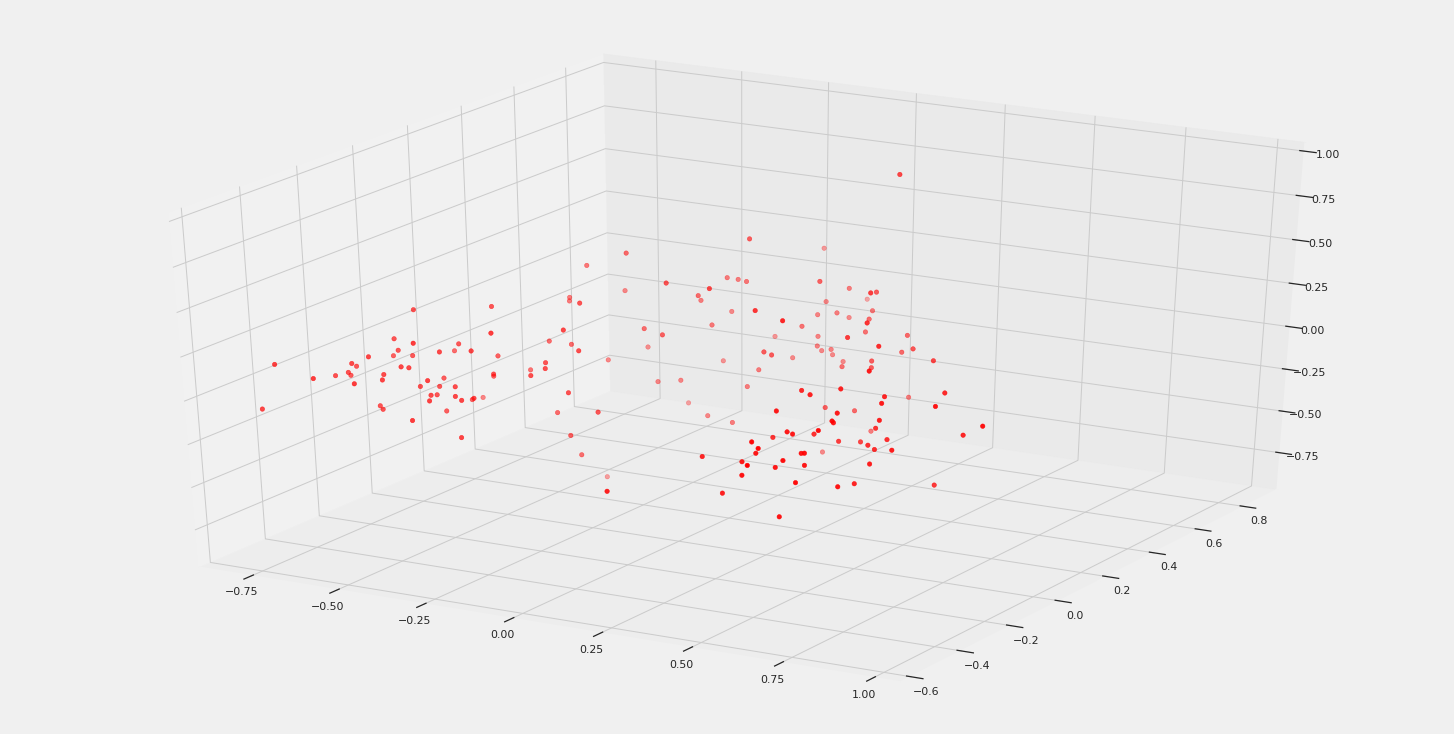

In [ ]:
#visualize our PCA transformed data
from mpl_toolkits.mplot3d import Axes3D

plt.style.use('fivethirtyeight')
fig = plt.figure(figsize= (20, 10))
ax = Axes3D(fig)

ax.scatter(pca_samples_3d[:,0], pca_samples_3d[:,1], pca_samples_3d[:,2], color='red')


plt.show()

We will use an analytical approach before performing our clustering task rather than assuming that 3 clusters is the most reasonable number of groups.

This analytical will be done as follows:

1) We will fit our clustering algorithm using several different values of k where k is the number of clusters. We will have k range from 2 to 20.

2) For each value of k, we will evaluate the clustering results using the average silhouette score. We will plot the sillhouette score against each k value and identify which number of clusters leads to the best results.

3) We will then assign cluster labels to our dataset using the fitted clustering model with the optimal number of clusters k.

The sillhouette score can be roughly described as a measure of how close a sample is to members of its own cluster as compared to members of other clusters. The silhoette score ranges from -1 to 1. A score close to one indicates that a record is very close to other members of its cluster and far from members of other clusters. A score of 0 indicates that a record lies on the decision boundary between two clusters. A negative score indicates that a sample is closer to members of a cluster other than its own. By taking the average silhouette score for all records when various number of clusters are used in our clustering algorithm, we can find the optimal number of clusters that promotes cohesion within individual clusters and good seperability between the clusters.

For the clustering algorithm itself, a Gaussian Mixture Model was chosen. This was chosen for several reasons, including the fact that gaussian mixture models allow for mixed membership; GMM models assign probabilities that a given record belongs to a given cluster. This property may be useful for classifying wines which are blends of multiple types.

Another reason for choosing a GMM is that they are more flexible with regards to cluster shapes which deviate from a hyper-spherical one. It is impossible for us to directly observe the actual cluster shapes visually since they exist in an 13-dimensional space, so it is helpful to have a clustering algorithm with such flexibility.

### 11 . Clustering 

In [ ]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

max_k=20

sil_scores=[]
for i in range(2, max_k+1):
    clusterer = GaussianMixture(n_components=i, random_state=51, n_init=5)
    clusterer.fit(wines_norm)

    #Predict the cluster for each data point
    preds = clusterer.predict(wines_norm)

    #Find the cluster centers
    centers = clusterer.means_

    #Predict the cluster for each transformed sample data point
    sample_preds = clusterer.predict(wines_norm)

    #Calculate the mean silhouette coefficient for the number of clusters chosen
    score = silhouette_score(wines_norm, preds)
    sil_scores.append(score)
    
sil_scores= pd.Series(sil_scores, index= range(2,max_k+1))
max_score= sil_scores.max()
n_clusters= sil_scores.idxmax()
print('Max Silhouette Score: {:.3f}'.format(max_score))
print('Number of clusters: {}\n'.format(max_k))

print('First 3 Silhouette Scores')
print(sil_scores[0:3])

#refit the model to the K with the max silhouette score
clusterer = GaussianMixture(n_components=n_clusters, random_state=51, n_init=5)
clusterer.fit(wines_norm)

#Predict the cluster for each data point
preds = clusterer.predict(wines_norm)

#Find the cluster centers
centers = clusterer.means_

Max Silhouette Score: 0.317
Number of clusters: 20

First 3 Silhouette Scores
2    0.294016
3    0.317045
4    0.266844
dtype: float64


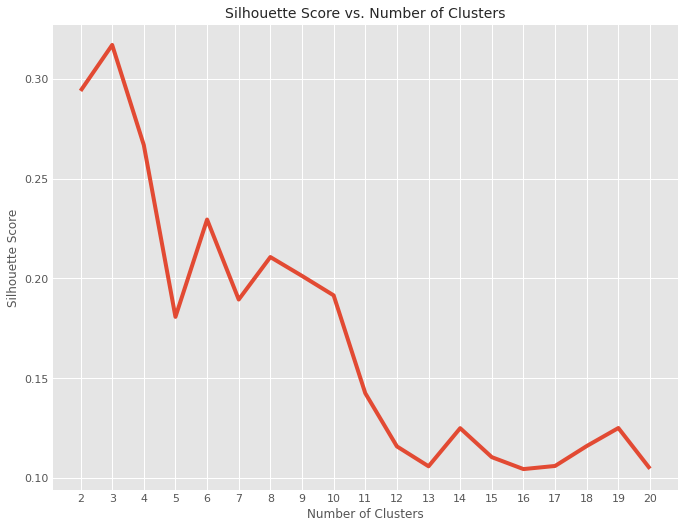

In [ ]:
plt.style.use('ggplot')
plt.figure(figsize=(10,8))
plt.title('Silhouette Score vs. Number of Clusters', fontsize=14)
plt.ylabel('Silhouette Score')
plt.xlabel('Number of Clusters')
plt.xticks(np.arange(2, max_k+1, 1))
plt.plot(sil_scores.index.values, sil_scores)

We see that the silhouette score is maximized when 3 clusters are used. Therefore, we fit the GMM using 3 clusters. We will now color each of our clusters and visualized the data in 3 dimensions again.

In [ ]:
#append cluster labels
pca_3d_clusters= np.append(pca_samples_3d, preds.reshape(-1, 1), axis=1)


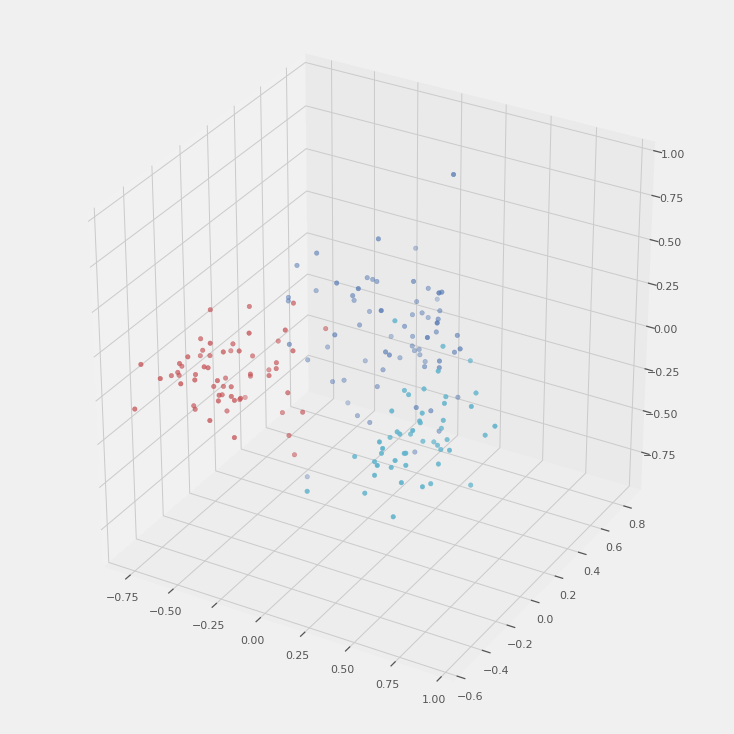

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

plt.style.use('fivethirtyeight')
fig = plt.figure(figsize= (10, 10))
ax = Axes3D(fig)

mapping= {0:'b', 1:'c', 2:'g'}
mapping= {0:'r', 1:'c', 2:'b'}
colors= [mapping[x] for x in preds]
ax.scatter(pca_3d_clusters[:,0], pca_3d_clusters[:,1], pca_3d_clusters[:,2], color= colors , marker= 'o')
plt.show()

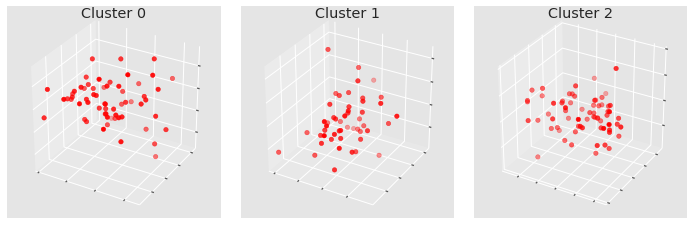

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

plt.style.use('ggplot')
plt.rcParams['figure.figsize']= [10, 3.5]
fig = plt.figure()

for i in range(3):

    ax=fig.add_subplot(1, 3, i+1, projection='3d')
    
    cluster_subset= pca_3d_clusters[pca_3d_clusters[:,3]==i]
    
    ax.scatter(cluster_subset[:,0], cluster_subset[:,1], cluster_subset[:,2], color='red', marker= 'o')
    
    ax.set_title('Cluster {}'.format(i))
    
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_zticklabels([])
    
plt.tight_layout(pad=2.0)

plt.show()

In [ ]:
wines_norm['cluster']= pca_3d_clusters[:, 3]

In [ ]:
for i in range(3):
    print('Cluster {}'.format(i))
    subset= wines_norm[wines_norm['cluster']==i]
    display(subset.describe())

Cluster 0


,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,cluster
count,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.0
mean,0.699355,0.529851,0.544748,0.377588,0.631170,0.681640,0.621602,0.423482,0.567452,0.594966,0.494431,0.655123,0.772305,0.0
std,0.128996,0.123079,0.126721,0.157245,0.117533,0.110256,0.076160,0.144165,0.117830,0.100957,0.096763,0.141083,0.109780,0.0
min,0.435068,0.353104,0.321584,0.036838,0.364842,0.472256,0.465555,0.136612,0.364646,0.393805,0.291663,0.403618,0.520442,0.0
25%,0.588054,0.464572,0.452885,0.312692,0.546481,0.606929,0.565441,0.351050,0.500499,0.520478,0.448199,0.537992,0.722346,0.0
50%,0.705300,0.493917,0.534707,0.366728,0.618538,0.671795,0.622250,0.418396,0.564397,0.600166,0.496902,0.654963,0.771328,0.0
75%,0.801972,0.534177,0.630069,0.461595,0.727348,0.735221,0.673832,0.500417,0.625257,0.661286,0.545293,0.763872,0.860497,0.0
max,1.000000,0.863069,0.993772,1.000000,0.894441,1.000000,0.800776,0.796864,0.855438,0.824287,0.688770,1.000000,1.000000,0.0


Cluster 1


,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,cluster
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.0
mean,0.547440,0.754012,0.528521,0.588403,0.536055,0.279881,0.136898,0.702250,0.321092,0.709898,0.178061,0.130482,0.459704,1.0
std,0.138272,0.161011,0.106564,0.116929,0.139325,0.128920,0.083820,0.209816,0.140951,0.150324,0.096944,0.088331,0.109869,0.0
min,0.299466,0.306692,0.291052,0.312692,0.248697,0.000000,0.000000,0.136612,0.074959,0.400096,0.000000,0.000000,0.174783,1.0
25%,0.454749,0.678143,0.458271,0.523285,0.415853,0.187448,0.076343,0.644209,0.209656,0.592755,0.096367,0.072892,0.372088,1.0
50%,0.544351,0.778314,0.501712,0.573825,0.526713,0.269820,0.109777,0.753615,0.312080,0.740467,0.165143,0.122004,0.471146,1.0
75%,0.640557,0.849735,0.621548,0.666623,0.640371,0.329615,0.179127,0.838254,0.399369,0.837071,0.239298,0.168882,0.530537,1.0
max,0.866785,0.990534,0.775173,0.862991,0.791876,0.671795,0.334640,0.964899,0.790950,1.000000,0.407360,0.389112,0.661743,1.0


Cluster 2


,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,cluster
count,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.0
mean,0.311316,0.457892,0.432834,0.526674,0.461313,0.487069,0.436390,0.552469,0.476879,0.336621,0.486708,0.513970,0.335533,2.0
std,0.138466,0.220693,0.171316,0.161681,0.181662,0.183724,0.147090,0.225662,0.194291,0.121067,0.161201,0.180560,0.161183,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.052524,0.073356,0.000000,0.000000,0.000000,0.182186,0.094144,0.000000,2.0
25%,0.210337,0.302119,0.301186,0.419794,0.364842,0.369752,0.342596,0.407478,0.399369,0.270953,0.382741,0.381895,0.226966,2.0
50%,0.312440,0.445864,0.426110,0.523285,0.399318,0.472256,0.431694,0.592990,0.468846,0.332913,0.472591,0.522731,0.332987,2.0
75%,0.357956,0.583126,0.523669,0.613712,0.565449,0.593771,0.502802,0.692688,0.568831,0.392508,0.605362,0.650994,0.473397,2.0
max,0.737451,1.000000,1.000000,0.932051,1.000000,0.894235,1.000000,1.000000,1.000000,0.646721,1.000000,0.867630,0.695573,2.0


### 12 . Hierachial Clustering

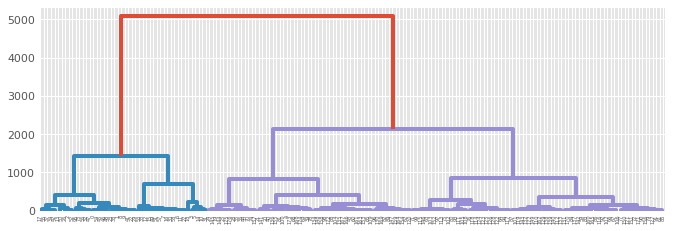

In [ ]:
dendogram=sch.dendrogram(sch.linkage(df,method="ward"))

 It shows there are three clusters

### 13. Conclusions 
1.Cluster 0 wines have a higher mean alcohol content and thus can be classified as dry wines.

2.Cluster 2 has the lowest alcohol content and thus will be sweeter that cluster 0 and 1 wines.

3.Given that cluster 1 wines have a higher Malic acid content,they will taste abit more sour as compared to cluster 0 and 2 wines despite cluster 0 wines being drier than cluster 1.

